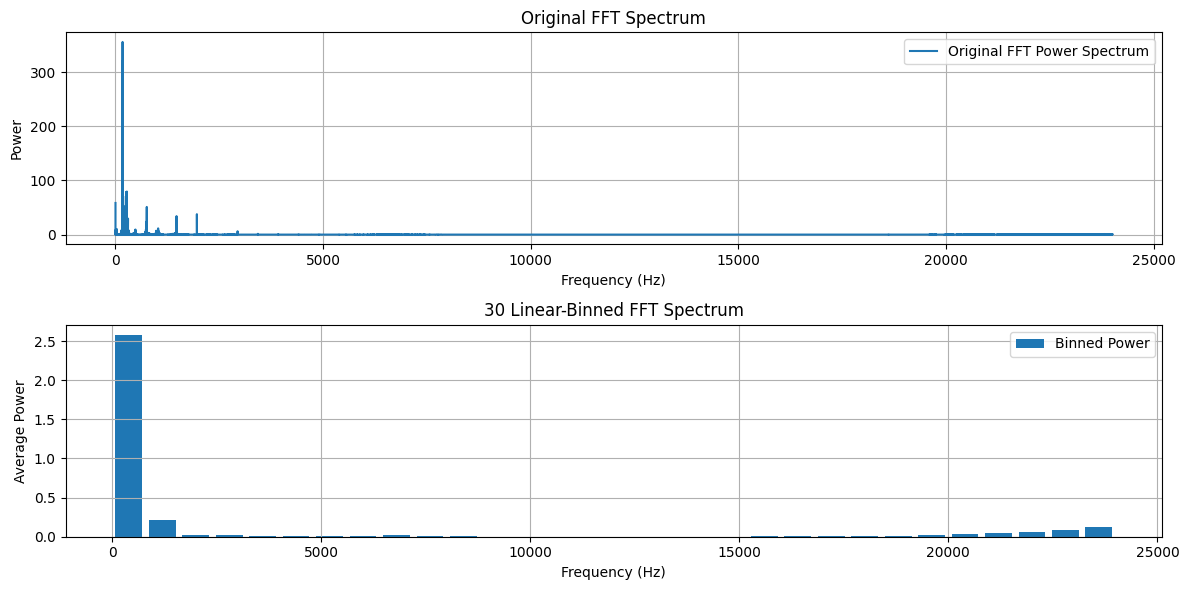

In [2]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

# 載入音頻文件
#file_path = r'20250108\TypeD_3.wav'  # 替換為你的音頻文件路徑
file_path = r'20250108_N\TypeA.wav'  # 替換為你的音頻文件路徑
signal, Fs = librosa.load(file_path, sr=None, mono=True)  # Fs 為取樣率

# 只取中間部分進行分析（可選）
duration = 10  # 分析的音頻時長 (秒)
start_sample = len(signal) // 2 - int(Fs * duration // 2)
end_sample = start_sample + int(Fs * duration)
signal = signal[start_sample:end_sample]

# 執行 FFT
N_fft = len(signal)
freqs = np.fft.rfftfreq(N_fft, 1 / Fs)  # 正頻段頻率軸
fft_values = np.fft.rfft(signal)  # 正頻段 FFT 結果
fft_magnitude = np.abs(fft_values)**2  # 功率譜

# 線性分頻
N = 30  # 線性頻段數量
freq_bin_width = (Fs / 2) / N  # 每個分區的頻率寬度
bin_edges = np.linspace(0, Fs / 2, N + 1)  # 分區邊界
binned_power = np.zeros(N)  # 每個分區的功率

for i in range(N):
    # 找到屬於當前分區的頻率點索引
    indices = np.where((freqs >= bin_edges[i]) & (freqs < bin_edges[i + 1]))[0]
    binned_power[i] = np.mean(fft_magnitude[indices]) if len(indices) > 0 else 0

# 可視化結果
plt.figure(figsize=(12, 6))

# 原始 FFT 頻譜
plt.subplot(2, 1, 1)
plt.plot(freqs, fft_magnitude, label="Original FFT Power Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.title("Original FFT Spectrum")
plt.grid()
plt.legend()

# 線性分頻後的結果
plt.subplot(2, 1, 2)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # 每個分區的中心頻率
plt.bar(bin_centers, binned_power, width=freq_bin_width * 0.8, align='center', label="Binned Power")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Average Power")
plt.title(f"{N} Linear-Binned FFT Spectrum")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


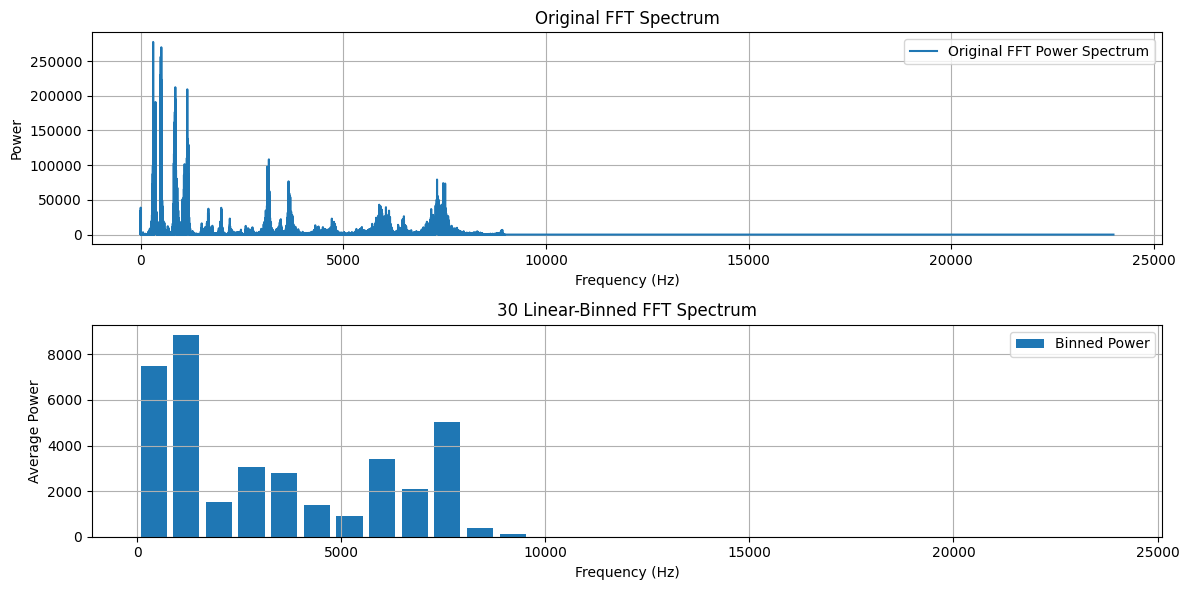

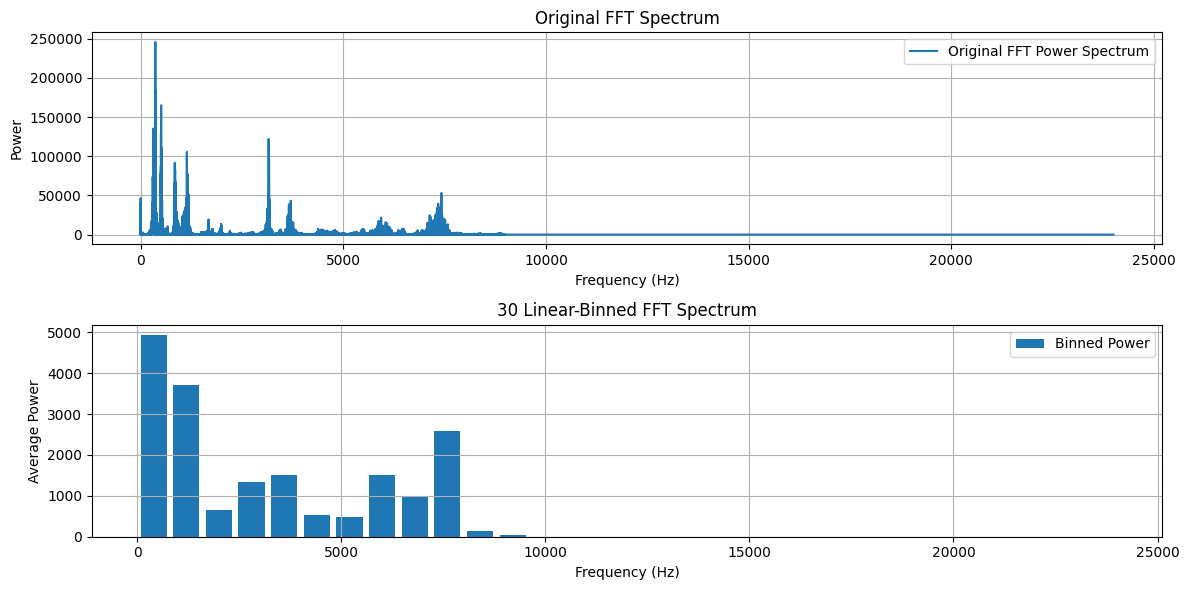

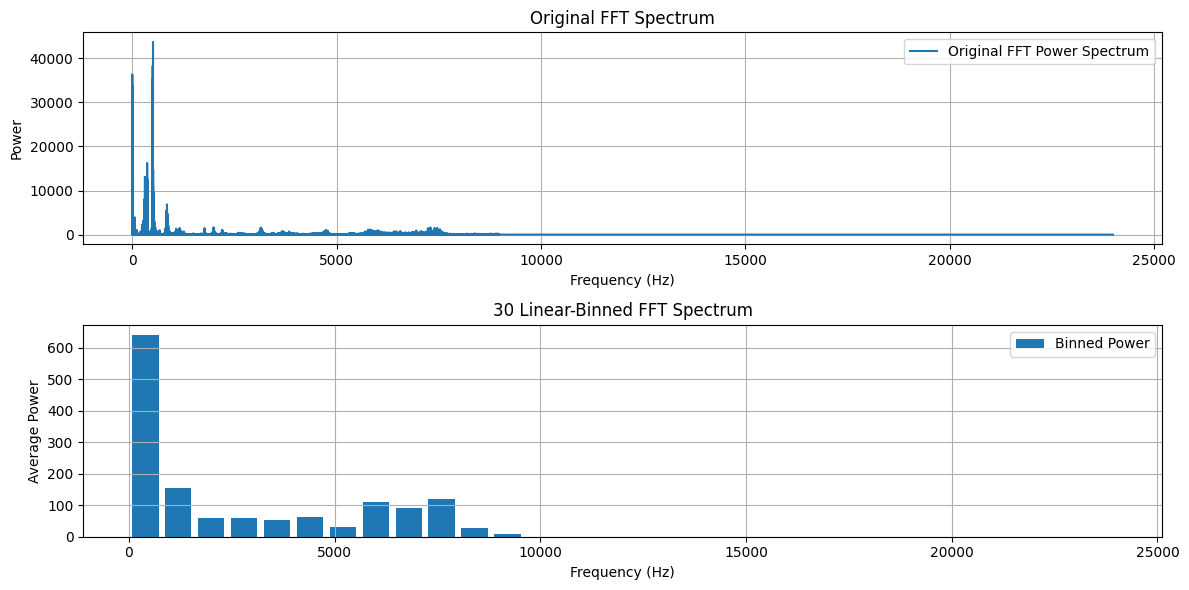

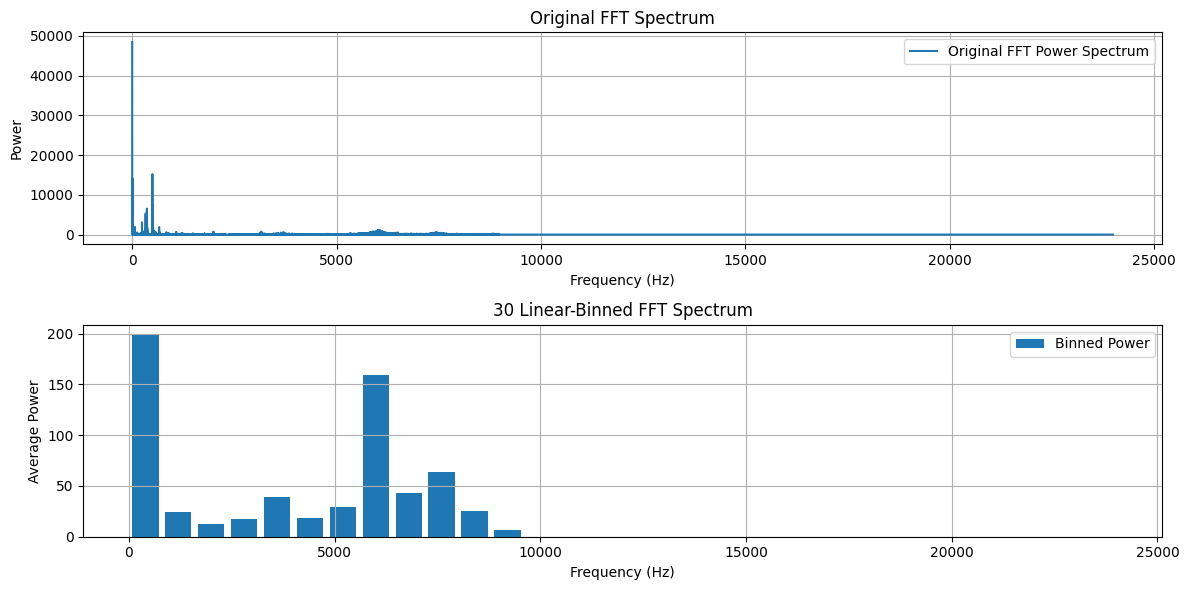

In [3]:
import numpy as np
import librosa
import matplotlib.pyplot as plt



def FFT(start_time,duration):
    # 載入音頻文件
    file_path = r'20250117/2B.wav'  # 替換為你的音頻文件路徑
    signal, Fs = librosa.load(file_path, sr=None, mono=True)  # Fs 為取樣率

    # 計算對應的採樣範圍
    start_sample = int(start_time * Fs)
    end_sample = start_sample + int(duration * Fs)

    # 確保範圍在音頻長度內
    if start_sample < 0 or end_sample > len(signal):
        raise ValueError("指定的時間段超出音頻長度，請重新設定。")

    signal = signal[start_sample:end_sample]

    # 執行 FFT
    N_fft = len(signal)
    freqs = np.fft.rfftfreq(N_fft, 1 / Fs)  # 正頻段頻率軸
    fft_values = np.fft.rfft(signal)  # 正頻段 FFT 結果
    fft_magnitude = np.abs(fft_values)**2  # 功率譜

    # 線性分頻
    N = 30  # 線性頻段數量
    freq_bin_width = (Fs / 2) / N  # 每個分區的頻率寬度
    bin_edges = np.linspace(0, Fs / 2, N + 1)  # 分區邊界
    binned_power = np.zeros(N)  # 每個分區的功率

    for i in range(N):
        # 找到屬於當前分區的頻率點索引
        indices = np.where((freqs >= bin_edges[i]) & (freqs < bin_edges[i + 1]))[0]
        binned_power[i] = np.mean(fft_magnitude[indices]) if len(indices) > 0 else 0

    # 可視化結果
    plt.figure(figsize=(12, 6))

    # 原始 FFT 頻譜
    plt.subplot(2, 1, 1)
    plt.plot(freqs, fft_magnitude, label="Original FFT Power Spectrum")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power")
    plt.title("Original FFT Spectrum")
    plt.grid()
    plt.legend()

    # 線性分頻後的結果
    plt.subplot(2, 1, 2)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # 每個分區的中心頻率
    plt.bar(bin_centers, binned_power, width=freq_bin_width * 0.8, align='center', label="Binned Power")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Average Power")
    plt.title(f"{N} Linear-Binned FFT Spectrum")
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()


FFT(0,5)
FFT(5,5)
FFT(10,5)
FFT(15,5)

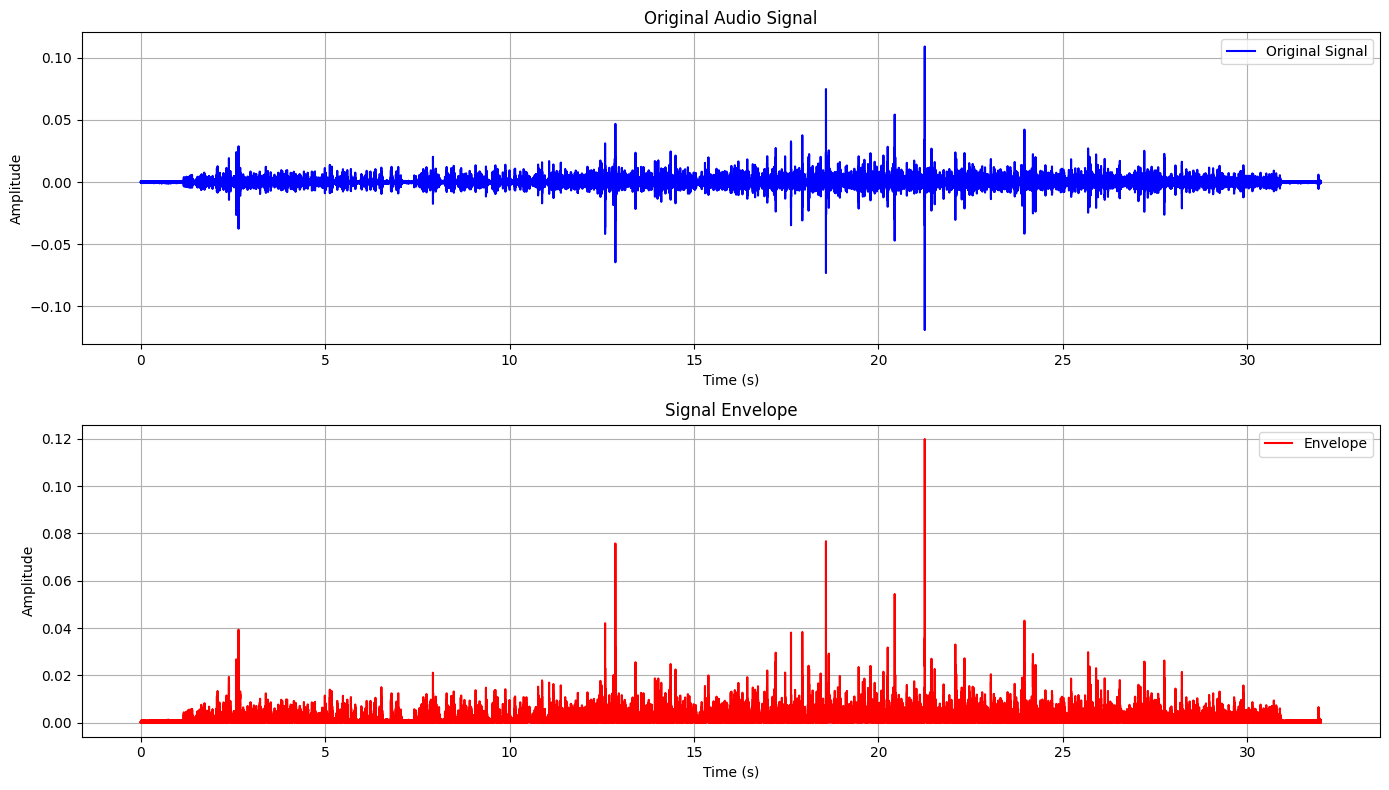

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
import librosa
import librosa.display

# 音檔路徑
file_path = r"20250108\TypeA_3.wav"

# 載入音頻
signal, Fs = librosa.load(file_path, sr=None, mono=True)  # sr=None 保持原始取樣率

# 提取音頻包絡線
analytic_signal = hilbert(signal)  # Hilbert 變換
envelope = np.abs(analytic_signal)  # 取絕對值作為包絡線

# 可視化信號與包絡線
time_axis = np.arange(len(signal)) / Fs  # 時間軸

plt.figure(figsize=(14, 8))

# 原始音頻信號
plt.subplot(2, 1, 1)
plt.plot(time_axis, signal, label="Original Signal", color="blue")
plt.title("Original Audio Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()

# 包絡線
plt.subplot(2, 1, 2)
plt.plot(time_axis, envelope, label="Envelope", color="red")
plt.title("Signal Envelope")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


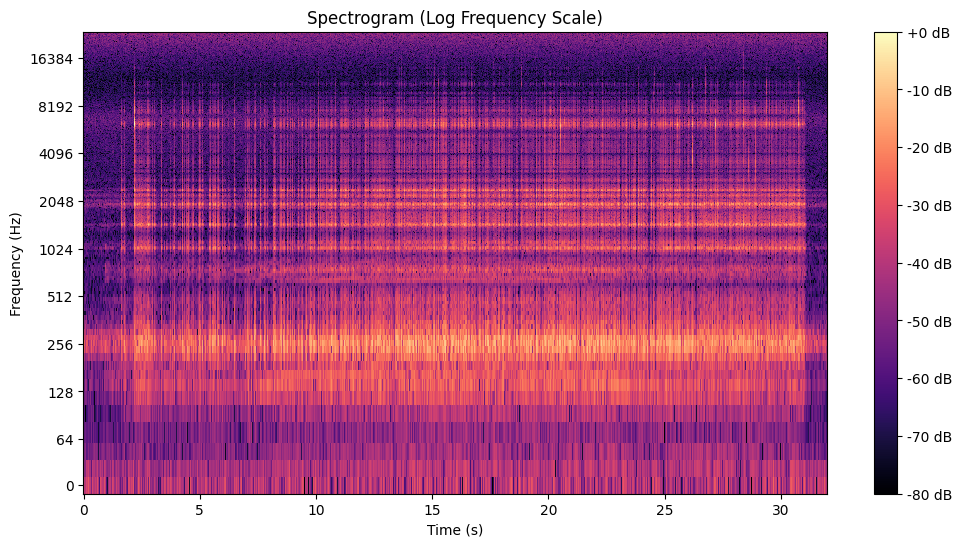

In [29]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# 載入音頻
file_path = r"20250108\TypeA_1.wav"
signal, Fs = librosa.load(file_path, sr=None, mono=True)

# 計算短時傅立葉變換 (STFT)
stft = librosa.stft(signal)
spectrogram = np.abs(stft)

# 可視化頻譜圖
plt.figure(figsize=(12, 6))
librosa.display.specshow(
    librosa.amplitude_to_db(spectrogram, ref=np.max),
    sr=Fs, x_axis='time', y_axis='log'
)
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram (Log Frequency Scale)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()

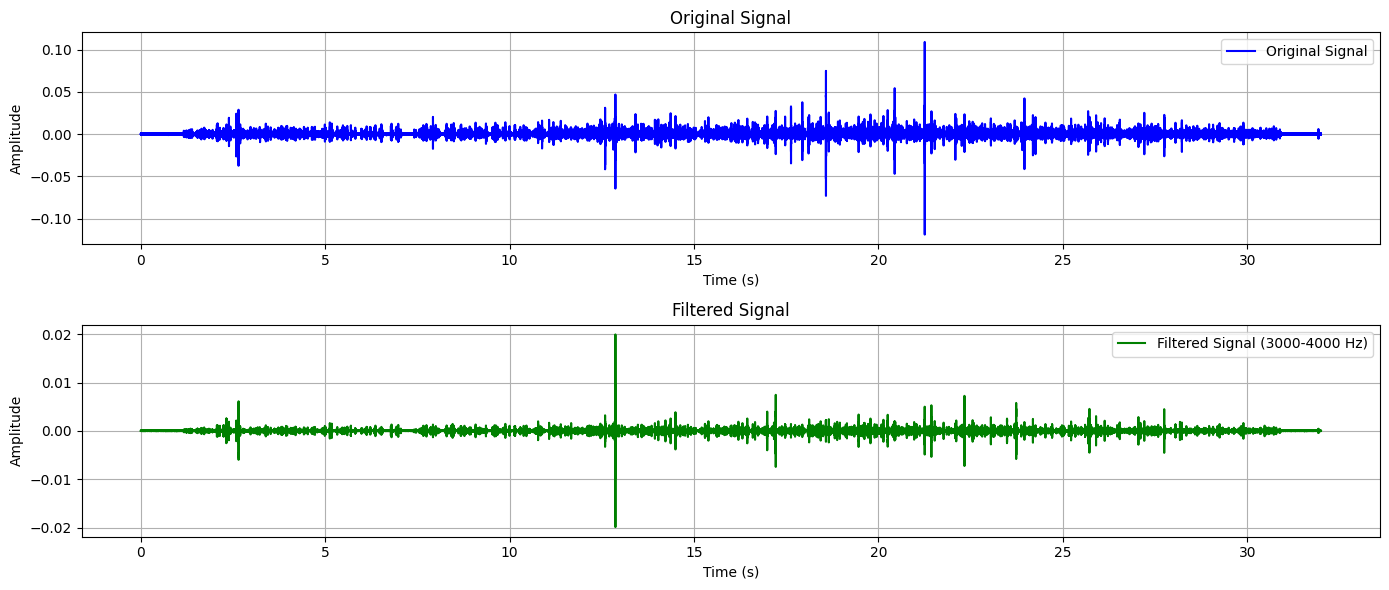

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import librosa

# 載入音頻
file_path = r"20250108\TypeA_3.wav"  # 替換為你的音頻文件路徑
signal, Fs = librosa.load(file_path, sr=None, mono=True)  # 保持原始取樣率

# 設置濾波器參數
low_cutoff = 3000  # 下截止頻率 (Hz)
high_cutoff = 4000  # 上截止頻率 (Hz)
order = 4  # 濾波器階數

# 設計帶通濾波器
nyquist = Fs / 2  # 奈奎斯特頻率
low = low_cutoff / nyquist
high = high_cutoff / nyquist
b, a = butter(order, [low, high], btype='band')  # 帶通濾波器係數

# 應用濾波器
filtered_signal = filtfilt(b, a, signal)

# 可視化原始與濾波後的信號
time_axis = np.arange(len(signal)) / Fs

plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.plot(time_axis, signal, label="Original Signal", color="blue")
plt.title("Original Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(time_axis, filtered_signal, label="Filtered Signal (3000-4000 Hz)", color="green")
plt.title("Filtered Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


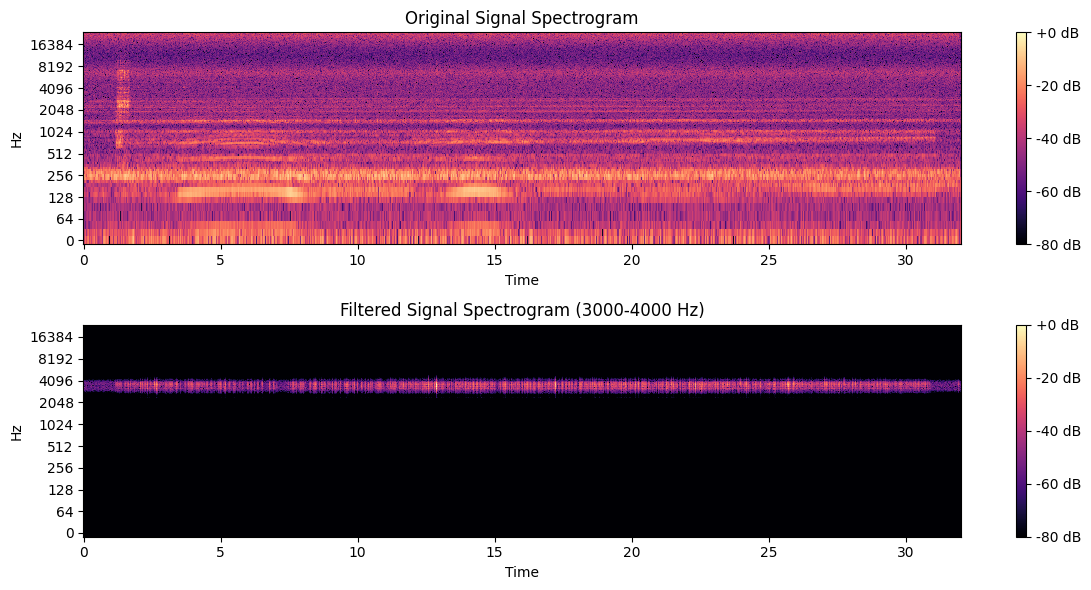

In [28]:
import librosa.display

# 計算短時傅立葉變換 (STFT)
stft_original = np.abs(librosa.stft(signal))
stft_filtered = np.abs(librosa.stft(filtered_signal))

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(stft_original, ref=np.max),
                         sr=Fs, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title("Original Signal Spectrogram")

plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(stft_filtered, ref=np.max),
                         sr=Fs, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title("Filtered Signal Spectrogram (3000-4000 Hz)")

plt.tight_layout()
plt.show()


In [9]:
import numpy as np
import librosa
import soundfile as sf
from scipy.signal import butter, filtfilt

# 載入音頻
file_path = r"20250108\TypeA_3.wav"  # 替換為你的音頻文件路徑
signal, Fs = librosa.load(file_path, sr=None, mono=True)  # 保持原始取樣率

# 設置濾波器參數
low_cutoff = 3000  # 下截止頻率 (Hz)
high_cutoff = 4000  # 上截止頻率 (Hz)
order = 4  # 濾波器階數

# 設計帶通濾波器
nyquist = Fs / 2  # 奈奎斯特頻率
low = low_cutoff / nyquist
high = high_cutoff / nyquist
b, a = butter(order, [low, high], btype='band')  # 帶通濾波器係數

# 應用濾波器
filtered_signal = filtfilt(b, a, signal)

# 將濾波後的音頻保存為 WAV 文件
output_file_path = r"20250108\Filtered_TypeA_3.wav"  # 指定輸出文件路徑
sf.write(output_file_path, filtered_signal, Fs)

print(f"濾波後的音頻已保存至: {output_file_path}")


濾波後的音頻已保存至: 20250108\Filtered_TypeA_3.wav
